<a href="https://colab.research.google.com/github/ManasaR08/Tensorflow/blob/main/Classification_evaluation_methods_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Metrics

## Accuracy
Accuracy = (tp+tn)/(tp+tn+fp+fn)
* Default metric for classification problems
* Not recommended for imbalanced datasets

## Precision
Precision = tp/(tp+fp)
* Higher precision leads to less false positives

## Recall
Recall = tp/(tp+fn)
* Higher recall leads to less false negatives

## F1 Score
F1 score = 2*[(precision*recall)/precision+recall)]
* Combination of precision and recall
* Good overall metric for classification models

## Confusion matrix
* When comparing predictions to truth labels to see where the model gets most confused.
* Is hard to use with very large number of classes

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["accuracy"])

#creating a learning rate callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(X_train,
                    y_train,
                    epochs = 25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.6824 - accuracy: 0.5638
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5650
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.5763
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.5725
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.5713
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.5938
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.6275
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.6963
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7212
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7675
Epoch 11/25
25/25 [

### Accuracy

In [5]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss: {loss:.2f}")
print(f"Model accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450
Model loss: 0.19
Model accuracy: 94.50%


### Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = tf.round(y_pred)
confusion_matrix(y_test, y_pred)

array([[90, 10],
       [ 1, 99]])

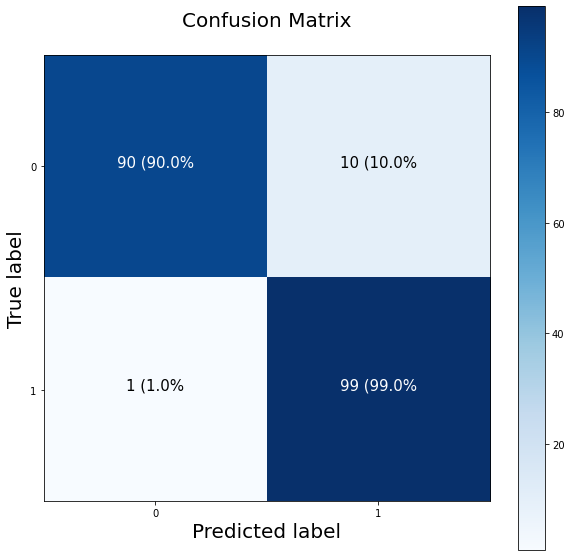

In [12]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion Matrix",
       xlabel = "Predicted label",
       ylabel = "True label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min())/2

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%",
           horizontalalignment = "center",
           color = "white" if cm[i,j]>threshold else "black",
           size = 15)

In [13]:
def pretty_confusion_matrix(y_test, y_pred):
  figsize = (10,10)

  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  classes = False
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  threshold = (cm.max() + cm.min())/2

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%",
            horizontalalignment = "center",
            color = "white" if cm[i,j]>threshold else "black",
            size = 15)

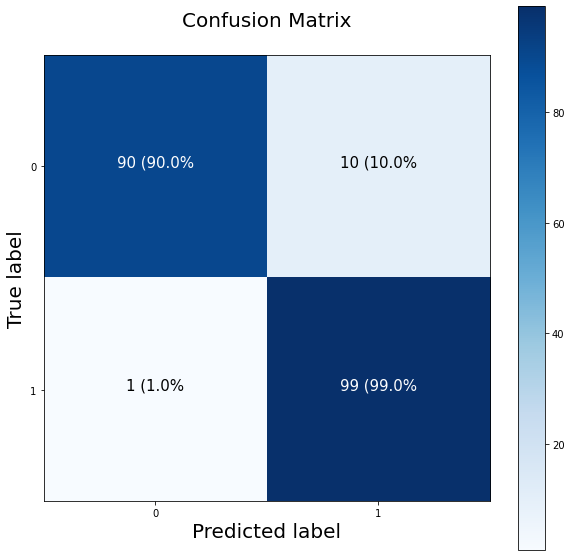

In [14]:
pretty_confusion_matrix(y_test, y_pred)